### This app picks the most frequently used nouns in last ten articles from the guardian.

In [75]:
#imports
import requests
import os

from bs4 import BeautifulSoup
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download("popular")



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date

True

In [76]:
#read the key from enviromental variables
GUARDIAN_KEY = os.getenv('GUARDIAN_KEY')

In [77]:
#if you dont have guardian api key register or just try to use 'test' as a key
url = f'https://content.guardianapis.com/news?order-by=newest&api-key={GUARDIAN_KEY}'

In [78]:
#read html into news variable
r = requests.get(url)
r.status_code
news = r.json()

In [79]:
#read the links to articles into list
news = news['response']['results']
df = pd.DataFrame(news)
news_links = df['webUrl']

In [80]:
#scrap all links into one article file
article = ''
for link in news_links:
    html = requests.get(link).content
    soup = BeautifulSoup(html, "html.parser")
    news_text = soup.find_all('p', class_='dcr-h26idz')
    for p in news_text:
        article = article + ' ' + p.text

In [81]:
len(article)

19293

In [82]:
#change text for words tokens
ar_tokens = word_tokenize(article, 'english')

In [83]:
#get rid of stopwords
stop_words = set(stopwords.words("english"))
words = [word for word in ar_tokens if word.casefold() not in stop_words]

In [84]:
#get rid of diferent variants of the same words
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(word) for word in words]


In [85]:
#pick only Nouns
words = nltk.pos_tag(words)

words_nouns = []
for word in words:
    if word[1] in ['NN', 'NNP', 'NNPS', 'NNS']:
        words_nouns.append(word[0])

In [86]:
len(words_nouns)
words_nouns = ' '.join(words_nouns)

In [87]:
#generata wordcloud object
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(words_nouns)

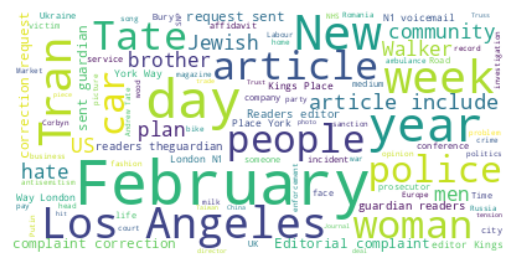

In [88]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()